In [ ]:
boston = datasets.load_boston()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
features = pd.DataFrame(boston.data,columns=boston.feature_names)

In [ ]:
features.shape

(506, 13)

In [ ]:
targets = boston.target

In [ ]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
features.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

**Data PreProcessing**

In [ ]:
features.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
# Since we are going t implement random forest which is an ensemble we do not have to see the skewness or the relationship of the dataset
# But to know about data it is our wish to see how data is spread

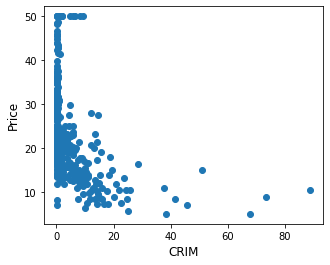

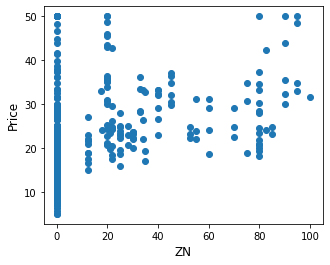

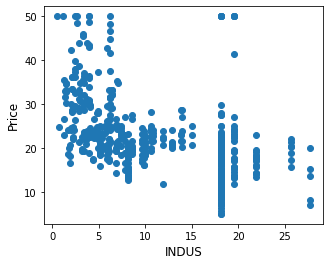

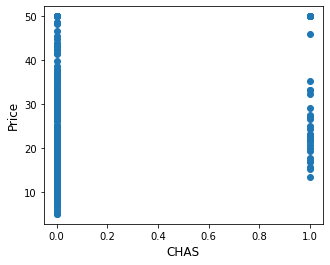

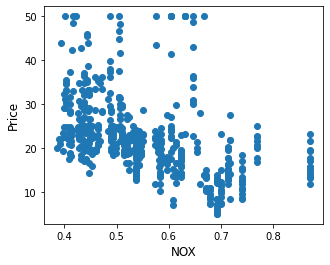

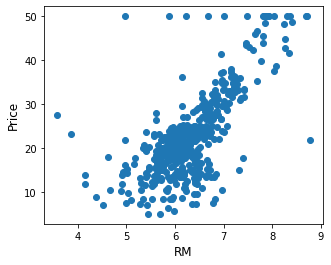

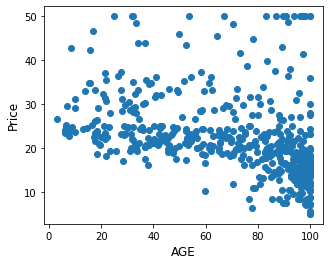

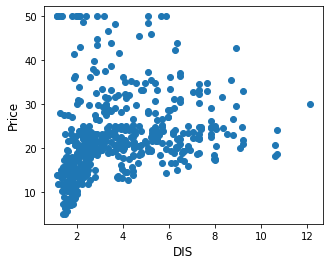

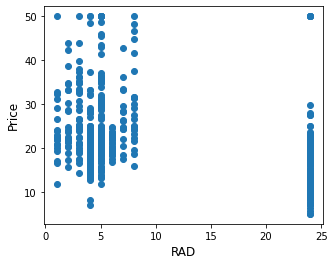

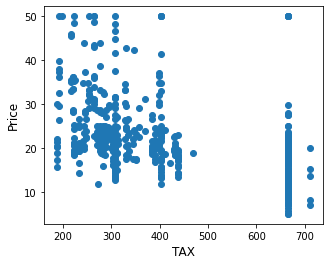

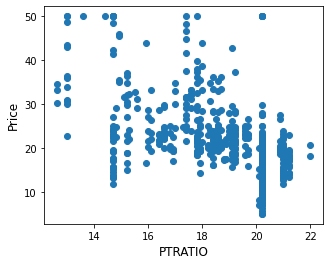

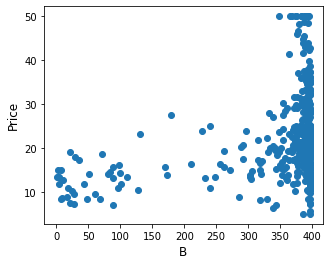

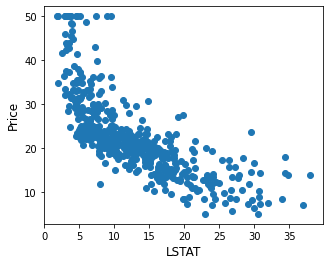

In [ ]:
for index, feature_name in enumerate(boston.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston.data[:, index], boston.target)
    plt.ylabel('Price', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

__Model using all features, no scaling, hyperparamter tuning etc__

In [ ]:
  x_train,x_test,y_train,y_test = train_test_split(features,targets,test_size = 0.25,random_state=55)

In [ ]:
x_train.shape

(379, 13)

In [ ]:
x_test.shape

(127, 13)

In [ ]:
rand_reg = RandomForestRegressor(random_state=0)

In [ ]:
rand_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = rand_reg.predict(x_test)

NameError: ignored

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)

2.10623622047244

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

9.481486251968496

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.0792022103084586

In [ ]:
rand_reg.score(x_train,y_train)

0.9811682150009161

In [ ]:
rand_reg.score(x_test,y_test)

0.8606105172354548

In [ ]:
metrics.r2_score(y_pred,y_test)

0.8324682297171059

__I can see my model is overfit, hence HyperParameter tuning__

In [ ]:
random_param = {
    "n_estimators" : [30,50,70,90],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
random_search = RandomizedSearchCV(estimator=rand_reg,param_distributions=random_param,cv=5,n_jobs =-1,verbose = 3)

In [ ]:
re = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.6s finished


In [ ]:
be = re.best_estimator_

In [ ]:
be.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
be.score(x_train,y_train)

0.920689761953386

In [ ]:
be.score(x_test,y_test)

0.8428794783912903

In [ ]:
grid_param = {
    "n_estimators" : [55, 60, 65],
    'criterion': ['mse'],
    'max_depth' : range(20,30,1),
    'min_samples_leaf' :[5],
    'min_samples_split': [7],
    'max_features' : ['auto']
}

In [ ]:
#As from the randomsearch CV I could see the n_estimator best is 70, I try values between 50 and 70 for that, max depth above 18

In [ ]:
grid_search = GridSearchCV(estimator=rand_reg,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   16.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
beg = grid_search.best_estimator_

In [ ]:
beg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
beg.score(x_train,y_train)

0.91977732171884

In [ ]:
beg.score(x_test,y_test)

0.8453202021441765

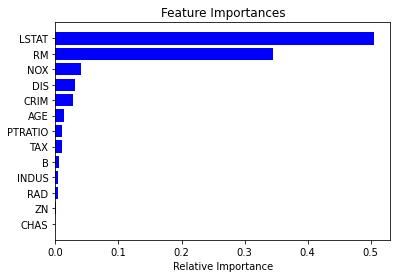

In [ ]:
features = boston['feature_names']
importances = beg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()